#  **주성분 분석(Principal Component Analysisc: PCA)**

비지도 학습 알고리즘 중 가장 광범위하게 사용되는 주성분 분석(PCA)에 대해 살펴본다. PCA는 기본적으로 차원 축소(dimensionality reduction) 알고리즘이지만 시각화(visualization), 노이즈 필터링(noise filtering), 특징 추출(feature extraction) 등을 위한 도구로도 유용하게 사용할 수 있다.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## **PCA 개요**

PCA의 개념을 설명하기 위한 예로 다음과 같이 200개의 2차원 점들을 생성해보자.

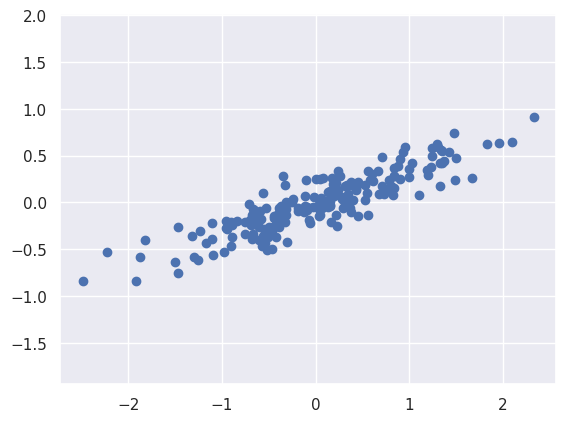

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

육안으로 볼 때 `x` 변수와 `y` 변수 사이에 거의 선형적인 관계가 있음을 알 수 있다. 이는 선형 회귀 데이터를 연상시킨다. 하지만 여기서는 우리의 관심사항은 `x`값에서 `y`값을 예측하는 것이 아니라 `x`값과 `y`값 사이의 관계를 학습하는 것이다.

주성분 분석에서 이 관계는 데이터에서 주축(principal axes)들을 찾고 해당 축을 사용하여 데이터 집합을 설명함으로써 정량화된다. Scikit-Learn의 PCA 추정기를 사용하면 다음과 같이 계산할 수 있다:


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

`fit`은 데이터로 부터 '주성분(components)'과 '설명 분산(explained variance)'을 학습합니다:

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


이 숫자가 무엇을 의미하는지 알아보기 위해 '주성분'을 사용하여 벡터의 방향을 정의하고 '설명 분산'을 사용하여 벡터의 제곱 길이를 정의하여 입력 데이터 위에 시각화해 보자:

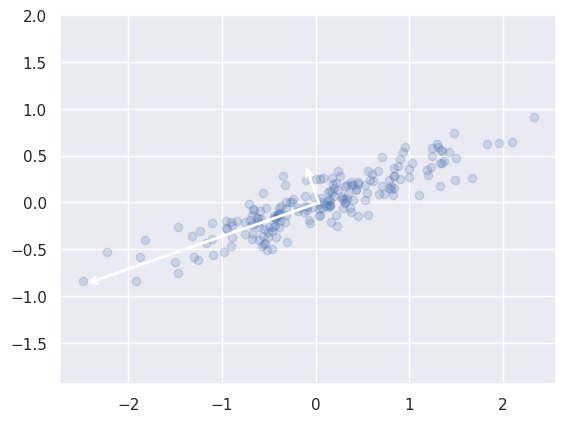

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

이러한 벡터는 데이터의 주축(principal axes)을 나타내며, 벡터의 길이는 데이터의 분포를 설명하는 데 있어 해당 축이 얼마나 중요한지를 나타내며, 더 정확하게는 해당 축에 투영했을 때 데이터의 분산을 측정한 값이다.
각 데이터 포인트를 주축에 투영(projection)한 것이 데이터의 '주성분(principal components)'이다.


> <img src="https://raw.github.com/ohheum/DS2022/28eb27434a740e9689d9e60ef78f1d928d4b4f74/assets/f5_82.png" width="660" height="330">





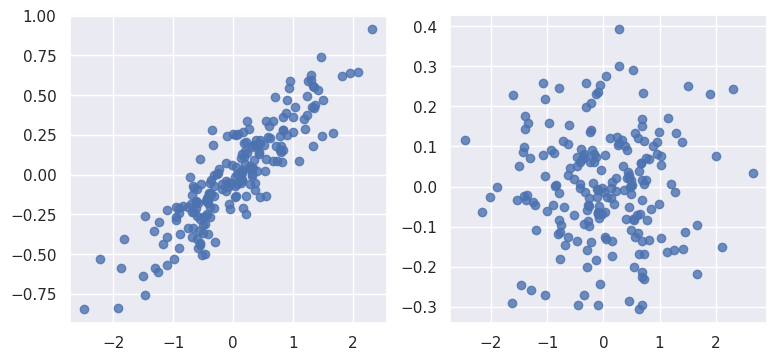

In [ ]:
X_pca = pca.transform(X)
fig, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.8)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)


데이터 축에서 주축으로의 변환은 아핀(affine) 변환으로, 기본적으로 이동(translation), 회전(rotation), 균일 스케일링(uniform scaling)으로 구성된다.

### 차원 축소로서의 PCA

차원 축소를 위해 PCA를 사용하는 경우 가장 큰 주성분들 만을 사용하여 데이터 분산을 최대한 보존하는 저차원 데이터 투영을 수행한다.

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


변환된 데이터는 단일 차원으로 축소되었다. 이 차원 축소 효과를 이해하기 위해 축소된 데이터의 역변환을 수행하여 원본 데이터와 함께 플롯해 보았다:

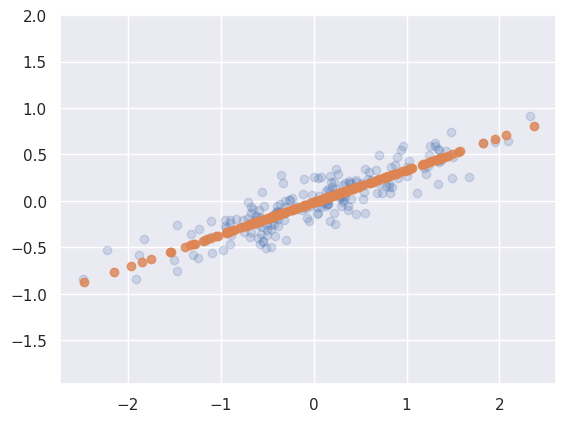

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

### PCA for visualization: Hand-written digits

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

데이터는 8×8픽셀 이미지로 구성되어 있으며, 따라서 각각의 손글씨 이미지를 하나의 64차원 점으로 볼 수 있다. 이러한 점들 간의 관계를 직관적으로 파악하기 위해 PCA를 사용하여 더 관리하기 쉬운 차원(예: 2차원)으로 투영할 수 있다:

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


이제 각 포인트의 처음 두 주성분을 플롯하여 데이터에 대해 알아볼 수 있다:

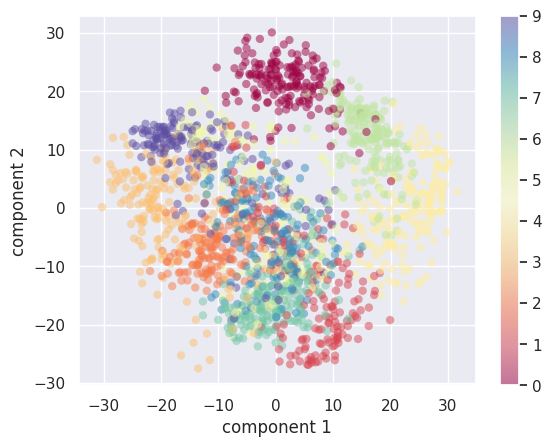

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=matplotlib.colormaps['Spectral'])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### 주 성분의 개수 선책하기

실제로 PCA를 사용할 때 중요한 부분은 데이터를 설명하는 데 필요한 주성분의 수를 추정하는 것이다. 이는 누적 설명 분산 비율을 구성 요소 수의 함수로 살펴봄으로써 결정할 수 있다:

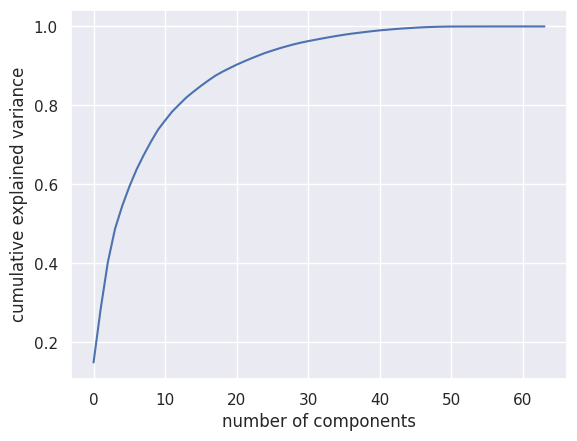

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

이 곡선은 전체 64차원 분산 중 첫 번째 𝑁개의 성분에 포함된 분산의 양을 정량화한다. 예를 들어, 처음 10개의 성분이 분산의 약 75%를 포함하고 있으며, 분산의 100%를 설명하려면 약 50개의 성분이 필요하다는 것을 알 수 있다.

## PCA as Noise Filtering

PCA는 노이즈가 있는 데이터에 대한 필터링 방법으로도 사용할 수 있다. 노이즈의 영향보다 분산이 훨씬 큰 구성 요소는 상대적으로 노이즈의 영향을 받지 않는다는 것이다. 따라서 큰 주성분들만을 사용하여 데이터를 재구성하는 경우 데이터의 주요한 부분은 유지하고 노이즈는 제거할 수 있다.

먼저 노이즈가 없는 입력 데이터 몇 개를 플롯해 보자:

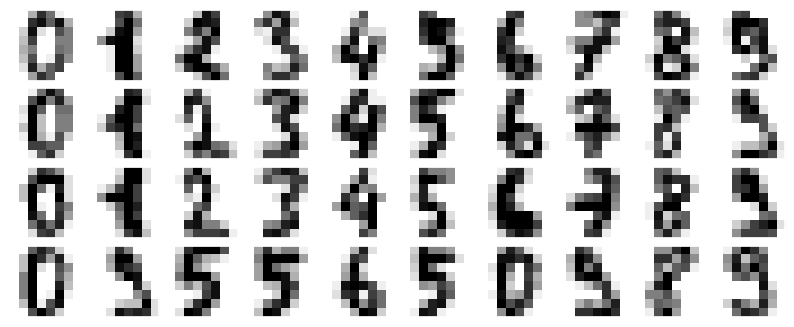

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

이제 랜덤 노이즈를 추가하여 노이즈가 있는 데이터 집합을 만들고 다시 플롯해 보자:




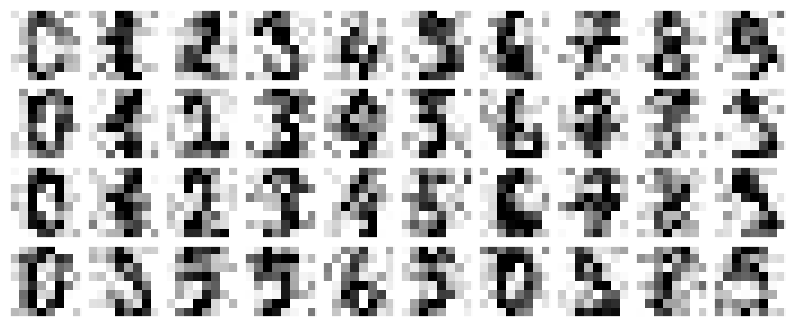

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

노이즈가 있는 데이터에 대해 PCA를 훈련하고 분산도의 50%를 보존하도록 한다:

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

12개의 주성분을 사용하면 분산의 50%가 보존된다.
이제 이러한 주성분을 계산한 다음 역변환을 사용하여 노이즈가 필터링된 숫자를 재구성한다:

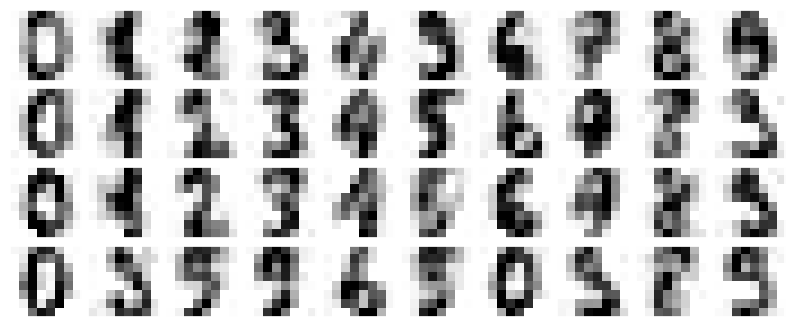

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## **예: Eigenfaces**


In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


이 데이터셋은 대규모 데이터셋이므로 ``RandomizedPCA``를 사용한다. 이 방법은 표준 PCA 추정기보다 훨씬 빠르게 첫 번째 주성분을 근사화(approximate)하므로 고차원 데이터(여기서는 차원이 거의 3,000개에 달함)에 매우 유용하다. 처음 150개의 구성 요소를 살펴보자:

In [ ]:
# from sklearn.decomposition import RandomizedPCA
pca = PCA(150, svd_solver='randomized')
# pca = PCA(150, svd_solver='randomized', whiten=True)
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

처음 몇 개의 주성분 이미지를 시각화하는 것이 흥미로울 수 있다. 주성분은 공분산 행렬의 고유벡터(eigenvectors)이므로 이러한 유형의 이미지를 종종 "고유면(eigenfaces)"이라고 부른다.

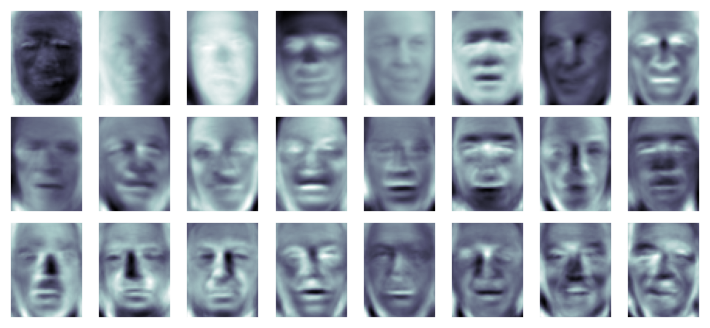

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

예를 들어, 처음 몇 개의 고유 얼굴(왼쪽 위부터)은 얼굴의 조명 각도와 연관된 것으로 보이며, 이후 주요 벡터는 눈, 코, 입술과 같은 특정 특징을 골라내는 것으로 보인다. 이러한 구성 요소의 누적 분산을 살펴보고 투영이 얼마나 많은 데이터 정보를 보존하고 있는지 확인해 보자:

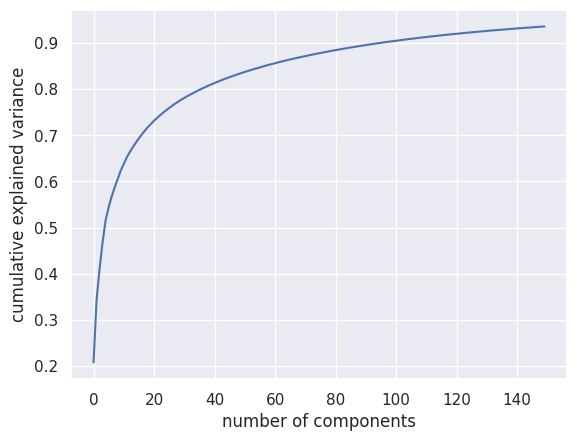

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

이 150개의 구성 요소가 분산의 90%를 조금 넘는다는 것을 알 수 있다. 따라서 이 150개의 구성 요소를 사용하면 데이터의 본질적인 특성을 대부분 복구할 수 있다고 생각할 수 있다. 이를 보다 구체적으로 확인하기 위해 입력 이미지와 이 150개의 구성 요소로 재구성된 이미지를 비교할 수 있다:

In [ ]:
# Compute the components and projected faces
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
print(components.shape)
projected = pca.inverse_transform(components)

(1348, 150)
(1348, 2914)


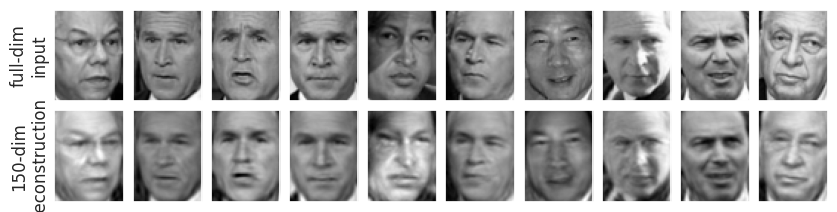

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

위쪽 행은 입력 이미지를 보여주고, 아래쪽 행은 약 3,000개의 초기 특징 중 150개만 재구성한 이미지를 보여준다. 데이터의 차원을 20배 가까이 줄였지만, 투영된 이미지에는 육안으로 이미지 속 인물을 인식할 수 있을 만큼 충분한 정보가 포함되어 있다. 이미지를 인물에 따라 분류하는 것이 목적인 경우 3,000차원 데이터가 아닌 150차원 데이터로 학습함으로써 훨씬 더 효율적인 분류를 할 수 있다는 뜻이다.